# Python Visulization of SpringSaLaD Outputs

This notebook demonstrates different ways visualize the CSV outputs generate by SpringSaLaD.

In [1]:
#Import necessary functions and data
from Visualization import *
from data_locator import data_file_finder
from display_info import *
from Project_reader import Describe_input_file

In [2]:
#Create the relative path to your desired SIMULATIONS directory
search_directory = os.path.join('Examples','R_L_test_difficult_SIMULATIONS','Simulation0_SIM_SIMULATIONS')
Describe_input_file(search_directory, reactions=True, kinetics=True)

MOLECULE: "R" (Initial Count: 5)

This molecule has 3 site types: R (2 possible states: State0, State1), L, Anchor

It consists of 4 connected sites:
Site 0 (Intracellular) of type "R"
Site 1 (Membrane) of type "Anchor"
Site 2 (Intracellular) of type "R"
Site 3 (Intracellular) of type "L"

It has 4 total links between sites:
Site 0 is connected to site 2, site 3
Site 1 is connected to site 3
Site 2 is connected to site 0, site 3
Site 3 is connected to site 1, site 0, site 2


MOLECULE: "Adapter" (Initial Count: 5)

This molecule has 2 site types: A, L

It consists of 3 connected sites:
Site 0 (Intracellular) of type "A"
Site 1 (Intracellular) of type "L"
Site 2 (Intracellular) of type "A"

It has 2 total links between sites:
Site 0 is connected to site 1
Site 1 is connected to site 0, site 2
Site 2 is connected to site 1


Reaction Rules

State Transition Reactions: 1
A site of type R in a R molecule can change its state from State0 to State1 at a rate of 0.0 s-1 provided that it is bo

In [3]:
path = data_file_finder(search_directory, ['data'], 'BondCounts')

file_info(path, True)

Selected File:
Simulation0_SIM_AverageBondCounts_0_11.csv

Parent Directory:
Examples\R_L_test_difficult_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER\data

Average Files:
BondCounts_0_0.csv                                  3.6 KB
BondCounts_0_11.csv                                 5.9 KB
MoleculeCounts_0_0.csv                              8.7 KB
MoleculeCounts_0_11.csv                             17.7 KB
SiteProperties_Adapter_Site_0_0_0.csv               6.6 KB
SiteProperties_Adapter_Site_0_0_11.csv              12.8 KB
SiteProperties_Adapter_Site_1_0_0.csv               5.6 KB
SiteProperties_Adapter_Site_1_0_11.csv              5.6 KB
SiteProperties_Adapter_Site_2_0_0.csv               6.6 KB
SiteProperties_Adapter_Site_2_0_11.csv              13.7 KB
SiteProperties_R_Site_0_0_0.csv                     7.6 KB
SiteProperties_R_Site_0_0_11.csv                    15.1 KB
SiteProperties_R_Site_1_0_0.csv                     5.6 KB
SiteProperties_R_Site_1_0_11.csv        

In [4]:
column_info(path)

Columns:
0: Time
1: BindingReaction0

List of indicies:
[1]


Examples\R_L_test_difficult_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER\data/pyStat


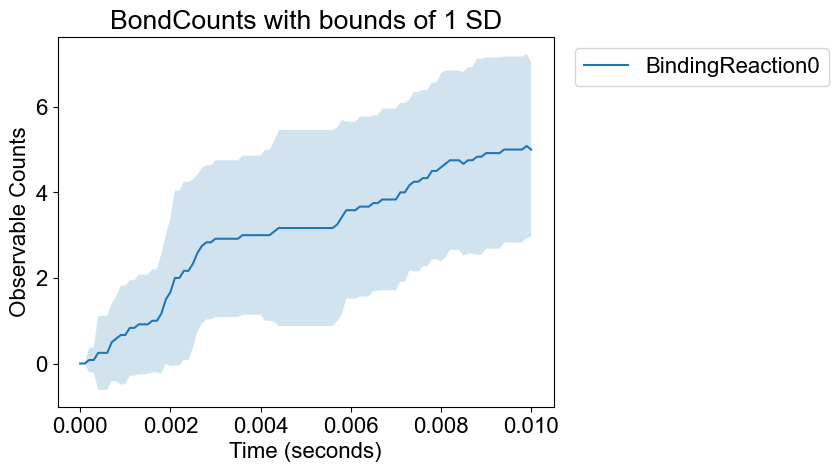

In [5]:
#Plot data for a specific molecule
Plotter.plot(path)

Columns:
0: Time
1: Free
2: Bound
3: State0
4: State1
5: BindingReaction0

List of indicies:
[1, 2, 3, 4, 5]
Examples\R_L_test_difficult_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER\data/pyStat


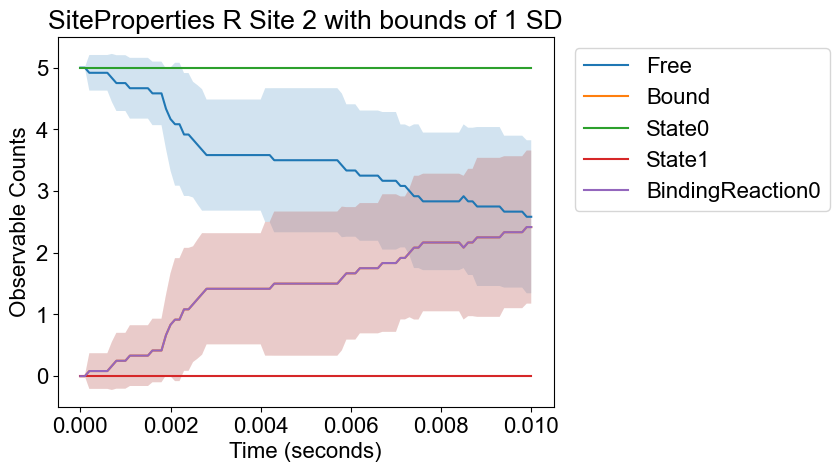

In [6]:
path = data_file_finder(search_directory, ['data'], 'Site_2_0')
column_info(path)
Plotter.plot(path)

Sites:
0:  R of R
1:  L of R
2:  Anchor of R
3:  A of Adapter
4:  L of Adapter

List of indicies:
[0, 1, 2, 3, 4]


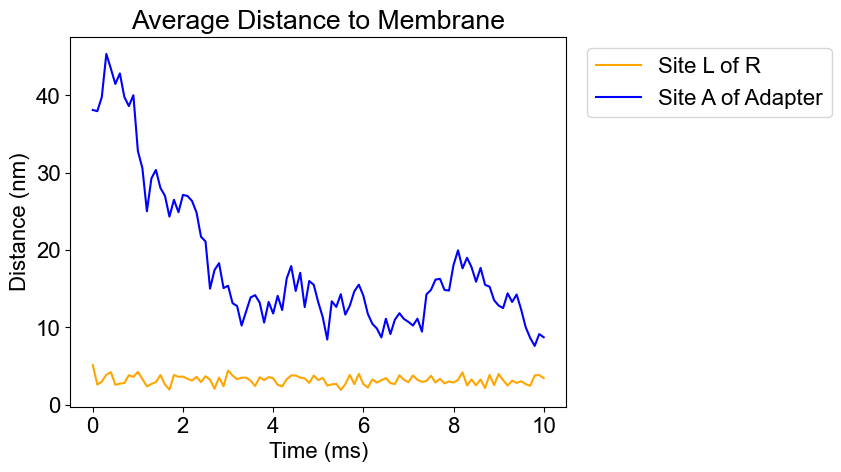

In [7]:
Average_z_pos.plot(search_directory, indicies=[1,3], run_num=10, verbose=True, legend_right=True, list_sites=True)


System:  Simulation0
Calculating Cluster Density ...
Progress : [****************************************] 100%


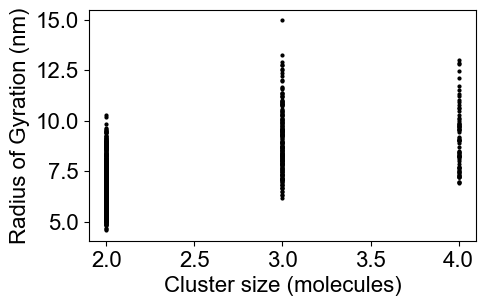

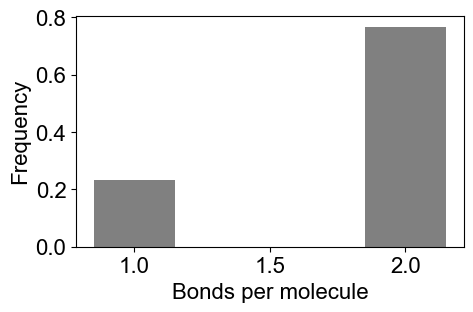

Execution time : 2.8536 secs


In [8]:
Spatial_Analysis.plot(search_directory, [])

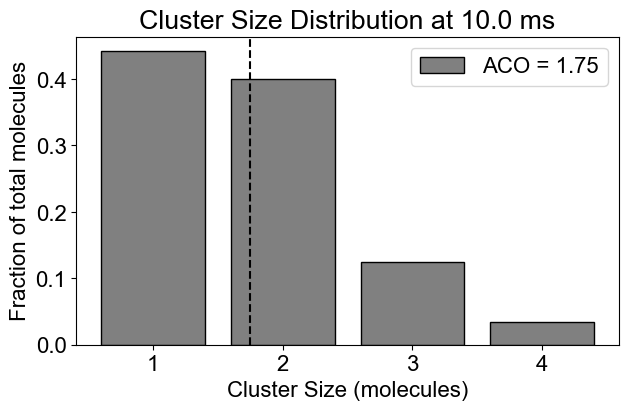

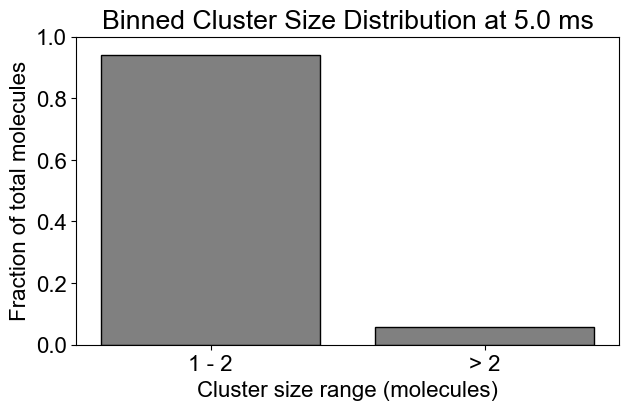

In [9]:
Histogram.plot(search_directory, [], 10)
Histogram.plot(search_directory, [1,2], 5)